In [1]:
%matplotlib inline
import h5py
import numpy
import matplotlib.pyplot as plt
import numpy as np 
from format_data import load_data
from PIL import Image
import tensorflow as tf

/home/ductri/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_set, test_set = load_data()

Files train.tar.gz are already downloaded
Files test.tar.gz are already downloaded


---
Normalize labels
---

In [3]:
EMPTY = 11
def normalize_labels(dataset):
    for i in range(len(dataset['labels'])):
        new_labels = dataset['labels'][i] + [EMPTY]*(5-len(dataset['labels'][i]))
        dataset['labels'][i] = new_labels
def show_sample(dataset):
    plt.figure(figsize=(12, 14))
    for i in range(10):
        for j in range(10):
            index = i*10 + j
            plt.subplot(10, 10, index + 1)
            plt.imshow(dataset['images'][index])
            plt.title('-'.join([str(int(digit)) if digit != EMPTY else '-' for digit in dataset['labels'][index] ]))
            plt.axis('off')
    plt.show()
def standardize_value(dataset):
    for i in range(len(dataset['images'])):
        gray_image = np.array(Image.fromarray(dataset['images'][i]).convert('L')) * 1.0
        normalized_image = (gray_image - 255)/255
        dataset['images'][i] = normalized_image

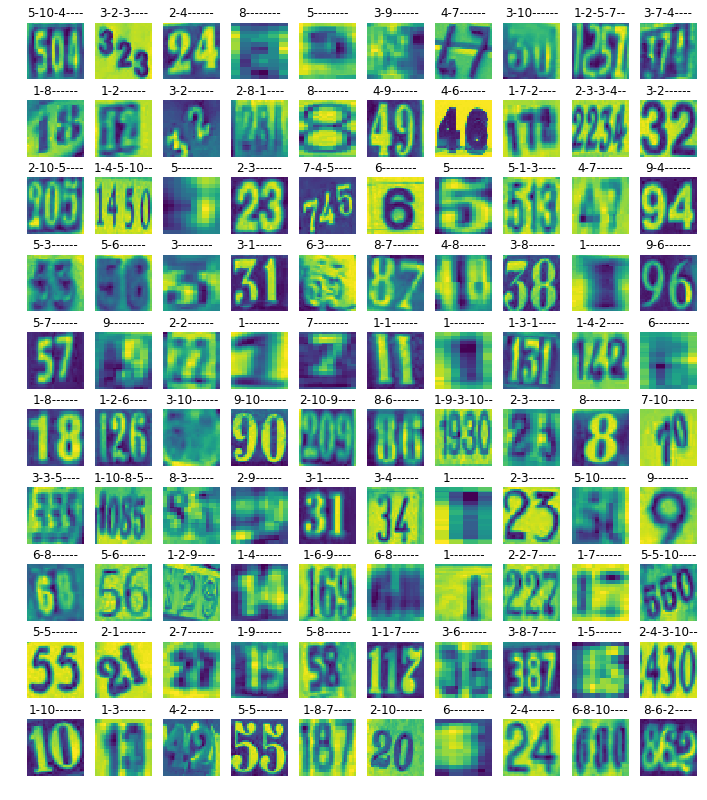

In [4]:
normalize_labels(train_set)
standardize_value(train_set)
show_sample(train_set)

In [ ]:
graph = tf.Graph()
BATCH_SIZE = 128
with graph.as_defautl():
    input_placeholder = tf.placeholder()